**25개의 변수 설명**



*ID: ID of each client 
*LIMIT_BAL: Amount of given credit in NT dollars (includes *individual and family/supplementary credit 
*SEX: Gender (1=male, 2=female)
*EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) 
*MARRIAGE: Marital status (1=married, 2=single, 3=others) 
*AGE: Age in years PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment *delay for nine months and above) 
*PAY_2: Repayment status in August, 2005 (scale same as above) 
*PAY_3: Repayment status in July, 2005 (scale same as above) *PAY_4: Repayment status in June, 2005 (scale same as above) *PAY_5: Repayment status in May, 2005 (scale same as above) *PAY_6: Repayment status in April, 2005 (scale same as above) *BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) 
*BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) *BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) *BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) *BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) *PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) 
*PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) 
*PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) 
*PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) 
*PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) 
*default.payment.next.month: Default payment (1=yes, 0=no)

**데이터 가져오기**

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

random.seed(20190730)

dataset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/default of credit card clients.csv")
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**null 값 확인**


In [12]:
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**데이터 유형 확인**
데이터를 전처리를 하기전에 데이터를 파악해봐야 겠지..?

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

null 값이 없는 것을 확인 했고,

간단한 요약정보로 데이터들이 object 타입인것을 확인

자.. 좀더 자세하게 데이터를 구경해볼까

In [17]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**범주형 데이터를 가지는 몇개의 속성들이 있다는 것을 확인!!**

In [18]:
#범주형 데이터들 
dataset[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


**데이터 전처리**

In [106]:
# 원본에서 라벨 ,ID분리 하기 
x0=dataset.drop('default payment next month',axis=1)            # 라벨만 분리된 데이터
x1=x0.drop('ID',axis=1)         # 라벨 과 ID 분리된 데이터

y0=dataset['default payment next month']       #라벨
y1=y0
# object 유형을 float 형으로 변환
x1=x1.astype(float)


#numpy 속성으로 변환한 데이터와 라벨
x=x1.values
y=y1.values





print(x1.info())
print(x1.head())
print(y1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null float64
EDUCATION    30000 non-null float64
MARRIAGE     30000 non-null float64
AGE          30000 non-null float64
PAY_0        30000 non-null float64
PAY_2        30000 non-null float64
PAY_3        30000 non-null float64
PAY_4        30000 non-null float64
PAY_5        30000 non-null float64
PAY_6        30000 non-null float64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
dtypes: float64(23)
memory usage: 5.3 MB
None
   LIMIT_BAL  SEX

원본에서 필요없는 속성을 제거 하고 라벨을 따로 분류 해주었다.

또, 정규화를 통해 데이터의 값 범위를 0~1사이로 만들어주어 측정 정확도,속도 업!! 

각 속성별 상관관계 행렬 히트맵

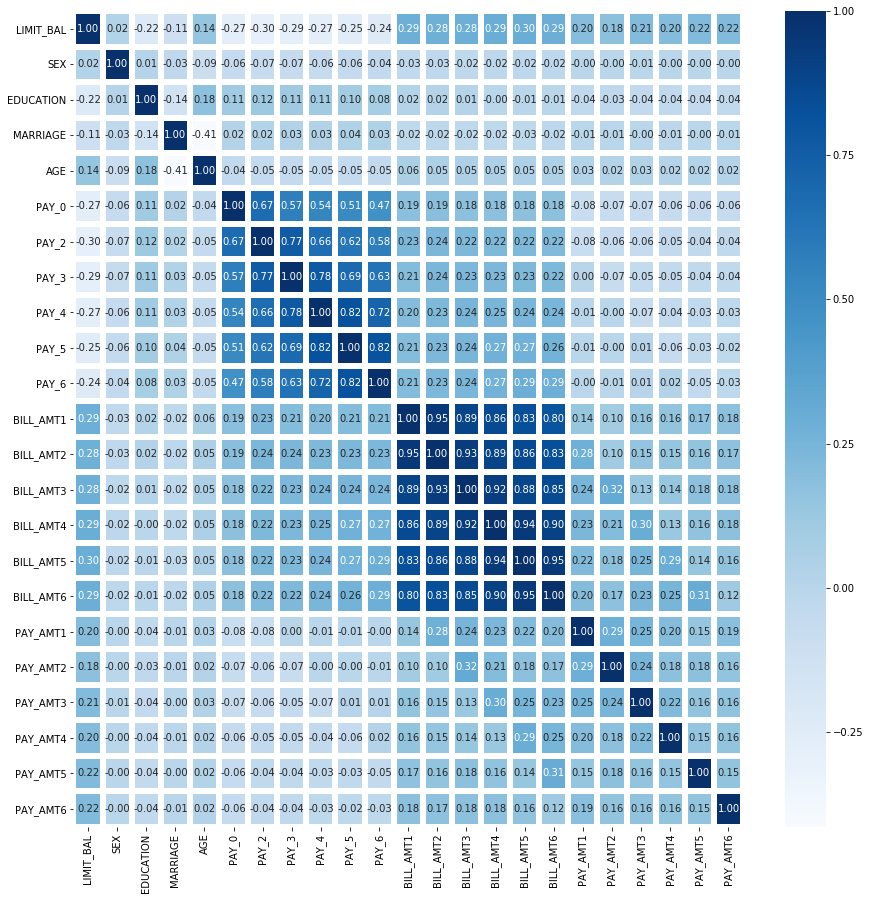

In [107]:


import seaborn as sns  


plt.figure(figsize=(15,15))
sns.heatmap(data = x1.corr(), annot=True, 
            fmt = '.2f', linewidths=5, cmap='Blues')

음... 대략적으로 어느속성이 중요한지 파악!! 

** stratifier 를 이용하여 train 셋, test 셋 7:3비율로 분리**

In [114]:






from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

x_train0, x_test0, y_train0, y_test0 = train_test_split(x1, y1, test_size=0.30, random_state=20190730,stratify=y)

#numpy 속성으로 변환시킨 트레인,라벨 들
x_train=x_train0
x_test= x_test0
y_train=y_train0
y_test=y_test0



from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# smote 하기
sm = SMOTE(ratio='auto', kind='regular')

# train데이터를 넣어 복제함
x_resampled, y_resampled = sm.fit_sample(x_train,list(y_train))
  




#데이터 단위 변환(정규화)
x_resampled_max = x_resampled.max(0)
x_resampled_min = x_resampled.min(0)
x_train= (x_train0 - x_resampled_min)/(x_resampled_max - x_resampled_min)

#데이터 단위 변환(정규화)
y_resampled_max = y_resampled.max(0)
y_resampled_min = y_resampled.min(0)
y_train= (y_train0 - y_resampled_min)/(y_resampled_max - y_resampled_min)


#데이터 단위 변환(정규화)
x_test0_max = x_test0.max(0)
x_test0_min = x_test0.min(0)
x_test= (x_test0 - x_test0_min)/(x_test0_max - x_test0_min)

#데이터 단위 변환(정규화)
y_test0_max = y_test0.max(0)
y_test0_min = y_test0.min(0)
y_test= (y_test0 - y_test0_min)/(y_test0_max - y_test0_min)


# x_train  확인
print(x_train0.info())
print("\n")
# x_train 라벨 확인 
print(x_test0.info())
print(y_train0.head(5))
print(y_test0.head(5))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 4577 to 347
Data columns (total 23 columns):
LIMIT_BAL    21000 non-null float64
SEX          21000 non-null float64
EDUCATION    21000 non-null float64
MARRIAGE     21000 non-null float64
AGE          21000 non-null float64
PAY_0        21000 non-null float64
PAY_2        21000 non-null float64
PAY_3        21000 non-null float64
PAY_4        21000 non-null float64
PAY_5        21000 non-null float64
PAY_6        21000 non-null float64
BILL_AMT1    21000 non-null float64
BILL_AMT2    21000 non-null float64
BILL_AMT3    21000 non-null float64
BILL_AMT4    21000 non-null float64
BILL_AMT5    21000 non-null float64
BILL_AMT6    21000 non-null float64
PAY_AMT1     21000 non-null float64
PAY_AMT2     21000 non-null float64
PAY_AMT3     21000 non-null float64
PAY_AMT4     21000 non-null float64
PAY_AMT5     21000 non-null float64
PAY_AMT6     21000 non-null float64
dtypes: float64(23)
memory usage: 3.8 MB
None


<class 'pandas

분리된  train데이터 와 test데이터를 확인!!  
그리고 이번에는  이전과 다르게 전처리를 
원본데이터를 7:3으로 나눠  smote를 적용 후
정규화를 해보았다


**신경망 구성하고 테스트!**

In [156]:
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt









model = models.Sequential()
model.add(layers.Dense(128,kernel_initializer='uniform', activation='relu', input_shape=((x_train.shape[1]),)))
model.add(layers.Dense(64, kernel_initializer='uniform',activation='relu'))
model.add(layers.Dense(32, kernel_initializer='uniform',activation='relu'))
model.add(layers.Dense(16, kernel_initializer='uniform',activation='relu'))
model.add(layers.Dense(1,kernel_initializer='uniform', activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
            




#검증셋 훈련
history = model.fit(x_train, y_train ,
                   
                    epochs=50,
                    batch_size=100,
                    validation_data=(x_test, y_test)
                   )





Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 128)               3072      
_________________________________________________________________
dense_122 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_123 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_124 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 17        
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________________________
Train on 21000 samples, validate on 9000 samples
Epoch 1/50
21000/21000 [==============================] - 3s 128us

AUC 점수

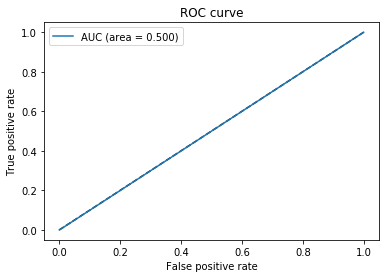

In [149]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_pred = model.predict(x_test0).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)



plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC (area = {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

정확도


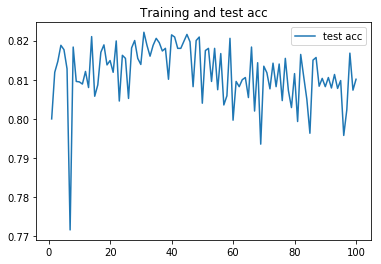

정확도: 0.8221111


In [155]:
acc = history.history['val_acc']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc,  label='test acc')

plt.title('Training and test acc')
plt.legend()

plt.show()
print("정확도:", max(acc))







F1 score

In [158]:
import tensorflow as tf

model.compile(optimizer='adam', loss='mse', 
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])


#검증셋 훈련
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=150,
                 )






precision = np.array(history.history['precision'])
recall = np.array(history.history['recall'])
f1_score = 2 * (precision*recall)/(precision + recall)
f1_score=max(f1_score)
print('f1_score:'  ,      f1_score)


Epoch 1/100
21000/21000 [==============================] - 1s 51us/sample - loss: 0.1332 - acc: 0.8221 - precision: 0.6704 - recall: 0.3854
Epoch 2/100
21000/21000 [==============================] - 1s 28us/sample - loss: 0.1332 - acc: 0.8220 - precision: 0.6725 - recall: 0.3811
Epoch 3/100
21000/21000 [==============================] - 1s 25us/sample - loss: 0.1330 - acc: 0.8219 - precision: 0.6675 - recall: 0.3882
Epoch 4/100
21000/21000 [==============================] - 1s 25us/sample - loss: 0.1332 - acc: 0.8228 - precision: 0.6733 - recall: 0.3864
Epoch 5/100
21000/21000 [==============================] - 0s 23us/sample - loss: 0.1332 - acc: 0.8220 - precision: 0.6734 - recall: 0.3787
Epoch 6/100
21000/21000 [==============================] - 0s 22us/sample - loss: 0.1330 - acc: 0.8222 - precision: 0.6708 - recall: 0.3851
Epoch 7/100
21000/21000 [==============================] - 0s 21us/sample - loss: 0.1330 - acc: 0.8214 - precision: 0.6696 - recall: 0.3804
Epoch 8/100
21000/21